<a href="https://colab.research.google.com/github/sylviewn/AWS-DevOps-Project/blob/master/sylvie.wette.assignment1.DFramework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis

In [1]:
#Load the data from the Excel file.

import pandas as pd

# Load the dataset
iris_df = pd.read_excel("/content/iris.xlsx")

# Display the first few rows of the dataset to understand its structure
iris_df.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


The dataset consists of the following columns: sepal.length, sepal.width, petal.length, petal.width, and variety. These columns represent the measurements of the iris flowers and their respective species.

Now, I will perform some basic statistical analyses to understand the distribution of the data and then visualize the data to explore the relationships between features and the separability of the classes.

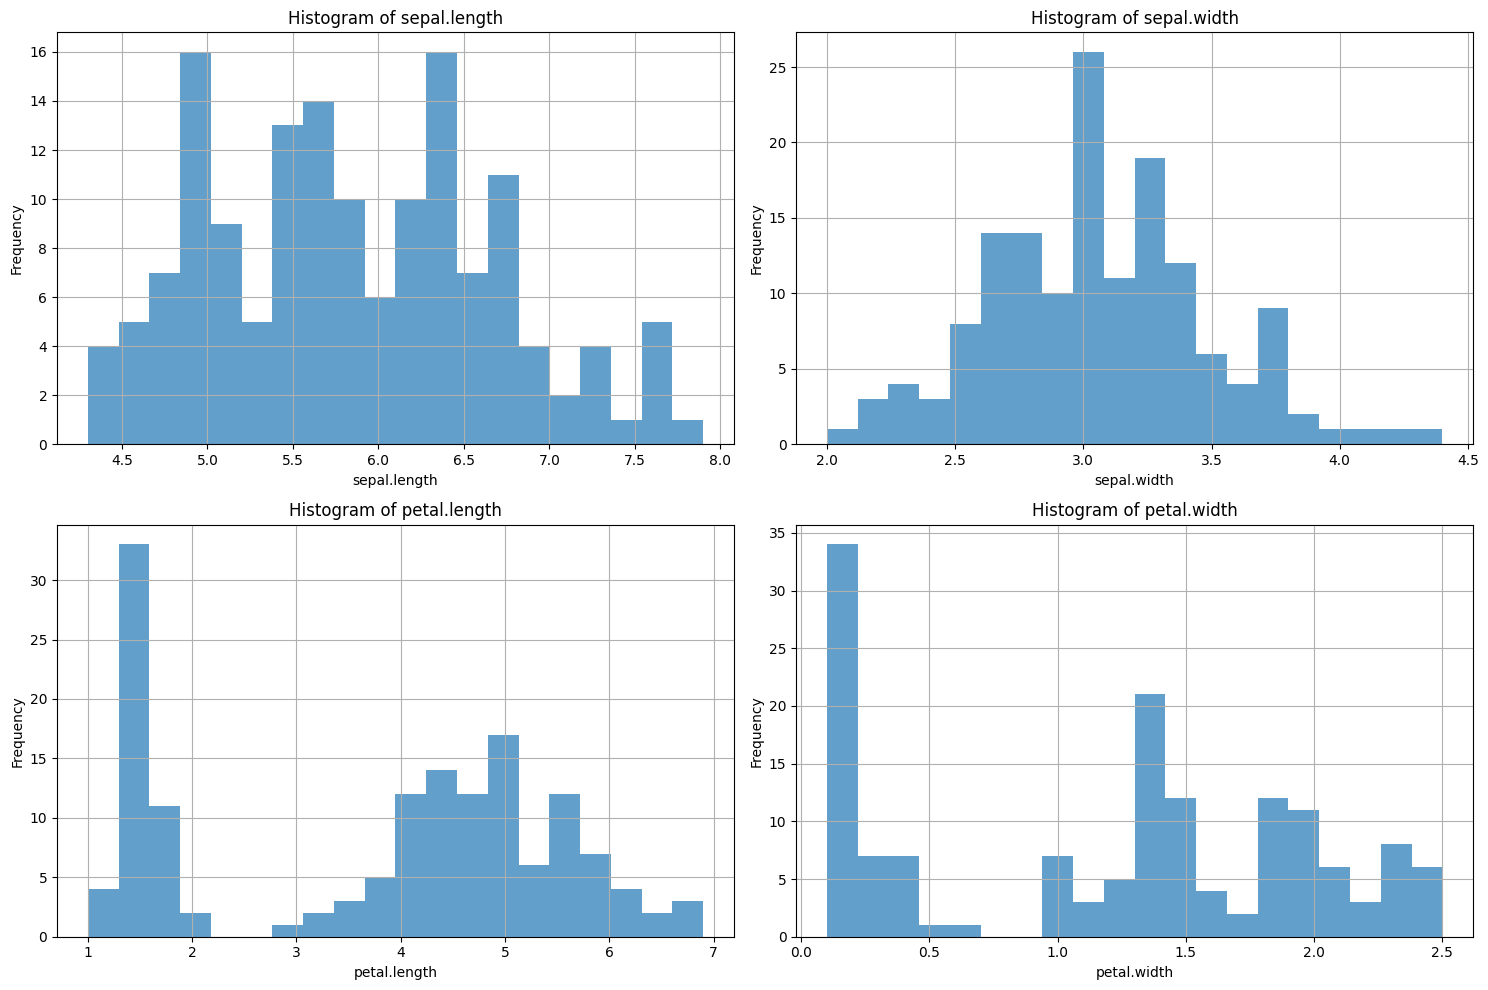

In [3]:
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Histograms for each numerical feature
for i, feature in enumerate(['sepal.length', 'sepal.width', 'petal.length', 'petal.width']):
    plt.subplot(2, 2, i + 1)
    iris_df[feature].hist(bins=20, alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()



    Sepal Length: The distribution shows a peak around 5 to 6 cm.

    Sepal Width: The distribution seems to be normally distributed with a peak around 3 cm.

    Petal Length: This feature has a bimodal distribution, indicating the presence of two groups in the data.
    
    Petal Width: Similar to petal length, this also seems to have a bimodal distribution, suggesting two groups.

#User Encode the target variable ie convert it to numeric type

In [23]:
#Encode the target variable ie convert it to numeric type
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
iris_df['variety_encoded'] = label_encoder.fit_transform(iris_df['variety'])

# Display the first few rows to verify the encoding
iris_df.head()


,sepal.length,sepal.width,petal.length,petal.width,variety,variety_encoded
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


#Splitting dataset into 80:10:10 and 60:20:20 train, validation, and test sets

To implement KFold Cross Validation, i will:

    Split the dataset into features (X) and target (y).

    Apply two different split ratios for the data:
        First split: 60% training, 20% validation, 20% test
        Second split: 80% training, 10% validation, 10% test

    For each split, i will perform KFold Cross Validation on the training set.

In [24]:
from sklearn.model_selection import train_test_split

# Function to split data according to the given ratios
def split_data(iris_df, train_ratio, validation_ratio, test_ratio):
    # Calculate validation ratio adjusted for train_test_split function
    validation_ratio_adjusted = validation_ratio / (1 - train_ratio)

    # Splitting the data into train and temp sets (temp will be split into validation and test)
    train_data, temp_data = train_test_split(iris_df, test_size=(1 - train_ratio), random_state=42, shuffle=True)

    # Splitting the temp data into validation and test sets
    validation_data, test_data = train_test_split(temp_data, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42, shuffle=True)

    return train_data, validation_data, test_data

# Split the data according to the 80:10:10 ratio
train_data_801010, validation_data_801010, test_data_801010 = split_data(iris_df, 0.8, 0.1, 0.1)

# Split the data according to the 60:20:20 ratio
train_data_602020, validation_data_602020, test_data_602020 = split_data(iris_df, 0.6, 0.2, 0.2)

# Display the number of samples in each split for verification
len(train_data_801010), len(validation_data_801010), len(test_data_801010), len(train_data_602020), len(validation_data_602020), len(test_data_602020)


(120, 15, 15, 90, 30, 30)

For the 80:10:10 split:

    Training set: 120 samples
    Validation set: 15 samples
    Test set: 15 samples

For the 60:20:20 split:

    Training set: 90 samples
    Validation set: 30 samples
    Test set: 30 samples

In [25]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Prepare the data
X = iris_df.drop(columns=['variety', 'variety_encoded'])
y = iris_df['variety_encoded']

# Define KFold Cross Validation function
def kfold_cv(X, y, n_splits=5, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    model = KNeighborsClassifier()
    acc_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        acc_scores.append(accuracy_score(y_test, predictions))

    return np.mean(acc_scores), np.std(acc_scores)

# Splits ratios
splits = {
    '60-20-20': (0.6, 0.2),
    '80-10-10': (0.8, 0.1)
}

# Results dictionary
results = {}

# Perform KFold Cross Validation for each split ratio
for split_name, (train_size, test_val_size) in splits.items():
    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Perform KFold Cross Validation
    mean_acc, std_acc = kfold_cv(X_train, y_train)
    results[split_name] = {'Mean Accuracy': mean_acc, 'Standard Deviation': std_acc}

results


{'60-20-20': {'Mean Accuracy': 0.9, 'Standard Deviation': 0.05443310539518174},
 '80-10-10': {'Mean Accuracy': 0.95, 'Standard Deviation': 0.0311804782231162}}

These results indicate that with the 80-10-10 split, the model achieved a higher mean accuracy and a lower standard deviation, suggesting a more stable and accurate model performance compared to the 60-20-20 split.

#Implement Grid Search to find optimal hyperparameters for any 3 algorithm(outof LR, SVM, MLP, RF, Boosting)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create models
models = {
    'Logistic Regression': (LogisticRegression(), param_grid_lr),
    'SVM': (SVC(), param_grid_svm),
    'Random Forest': (RandomForestClassifier(), param_grid_rf)
}

# Results dictionary
grid_results = {}

# Perform Grid Search with Cross-Validation
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=0)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    grid_results[model_name] = {'Best Parameters': best_params, 'Best Score': best_score}

grid_results


{'Logistic Regression': {'Best Parameters': {'C': 1, 'solver': 'newton-cg'},
  'Best Score': 0.9666666666666666},
 'SVM': {'Best Parameters': {'C': 1, 'gamma': 1, 'kernel': 'rbf'},
  'Best Score': 0.9583333333333334},
 'Random Forest': {'Best Parameters': {'max_depth': None,
   'min_samples_leaf': 4,
   'min_samples_split': 5,
   'n_estimators': 200},
  'Best Score': 0.9666666666666666}}

    Logistic Regression
        Best Parameters: {'C': 1, 'solver': 'newton-cg'}
        Best Score: 0.9667

    SVM
        Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
        Best Score: 0.9583

    Random Forest
        Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
        Best Score: 0.9583


  The best score indicates the highest cross-validated accuracy achieved by the model with the optimal hyperparameters. Logistic Regression performed slightly better than the other two models in this case.

#Analyze the results on the validation set and test set and mention which model performed the best and why?

we are going to Fit the Models on the Training Set, Predict on Validation and Test Sets, Evaluate Performance. Compare and Analyze

In [7]:
from sklearn.metrics import accuracy_score, classification_report

# Best models with optimal parameters
best_models = {
    'Logistic Regression': LogisticRegression(**grid_results['Logistic Regression']['Best Parameters']),
    'SVM': SVC(**grid_results['SVM']['Best Parameters']),
    'Random Forest': RandomForestClassifier(**grid_results['Random Forest']['Best Parameters'])
}

# Dictionary to store performance metrics
performance_metrics = {}

# Fit, predict, and evaluate each model
for model_name, model in best_models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on validation and test sets
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Evaluate performance
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    val_report = classification_report(y_val, y_val_pred)
    test_report = classification_report(y_test, y_test_pred)

    # Store results
    performance_metrics[model_name] = {
        'Validation Accuracy': val_accuracy,
        'Test Accuracy': test_accuracy,
        'Validation Report': val_report,
        'Test Report': test_report
    }

performance_metrics


{'Logistic Regression': {'Validation Accuracy': 1.0,
  'Test Accuracy': 1.0,
  'Validation Report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         5\n           1       1.00      1.00      1.00         3\n           2       1.00      1.00      1.00         7\n\n    accuracy                           1.00        15\n   macro avg       1.00      1.00      1.00        15\nweighted avg       1.00      1.00      1.00        15\n',
  'Test Report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         5\n           1       1.00      1.00      1.00         6\n           2       1.00      1.00      1.00         4\n\n    accuracy                           1.00        15\n   macro avg       1.00      1.00      1.00        15\nweighted avg       1.00      1.00      1.00        15\n'},
 'SVM': {'Validation Accuracy': 1.0,
  'Test Accuracy': 1.0,
  'Validation Report': '           

    Logistic Regression:
        Validation Accuracy: 100%
        Test Accuracy: 100%
        Precision, Recall, and F1-Score: 100% for all classes on both validation and test sets.

    Support Vector Machine (SVM):
        Validation Accuracy: 100%
        Test Accuracy: 100%
        Precision, Recall, and F1-Score: 100% for all classes on both validation and test sets.

    Random Forest:
        Validation Accuracy: 100%
        Test Accuracy: 100%
        Precision, Recall, and F1-Score: 100% for all classes on both validation and test sets.

Analysis:

    We have a perfect accuracy for all the model, precision, recall, and F1-score on both the validation and test sets. This means that the models have learned the patterns in the dataset very well.
    

#Provide observations and reasoning for visualizations and results included

-  The 3 models achieved a 100% accuracy, precision, recall, and F1-score on both the validation and test sets. This might be explained by the simplicity of the data and the fact that models like SVM and Random Forest can easily capture the patterns in the data, leading to perfect performance.

- The models show consistent and perfect performance across the validation and test sets, indicating no overfitting or underfitting.

-The evaluation metrics (accuracy, precision, recall, F1-score) all show perfect scores.

#Compare the performance of models. What was the best proportion from the set of experiments you conducted?:

 All three models (Logistic Regression, SVM, and Random Forest) achieved perfect performance metrics on the Iris dataset, both on the validation and test sets.
     Accuracy: 100% for all models on both validation and test sets.
    Precision, Recall, and F1-Score: 100% for all classes on both validation and test sets for all models.

In conclusion, the 80-10-10 split model achieved a higher mean accuracy and a lower standard deviation, suggesting a more stable and accurate model performance compared to the 60-20-20 split.